# Implement two-complement subtractor

## Check adder

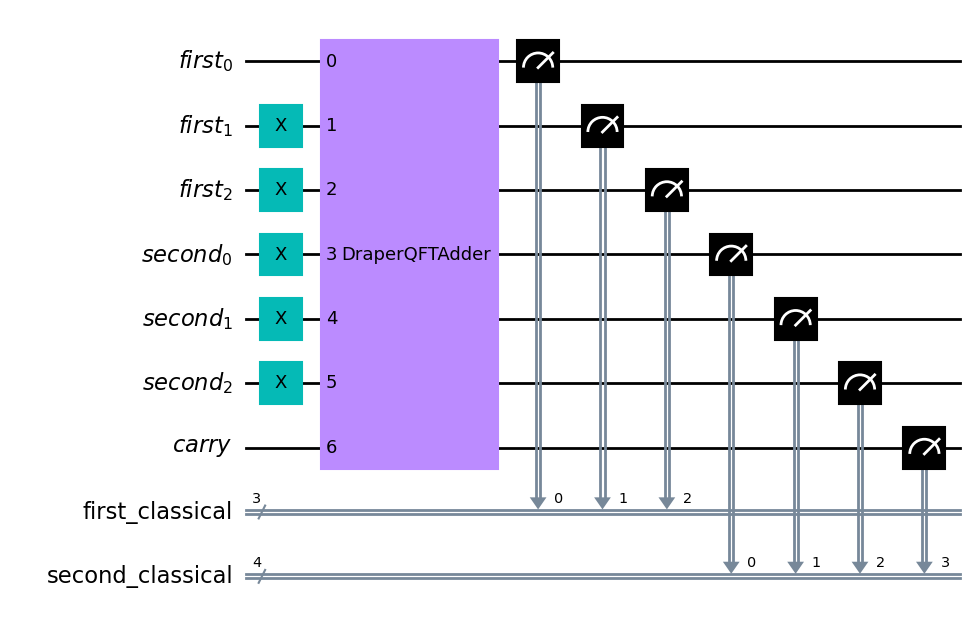

In [4]:
from qiskit.circuit.library import DraperQFTAdder
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

def loadNumber(circ: QuantumCircuit, register: QuantumRegister, number: int):
    number_in_binary = '0'*(register.size - len(bin(number)[2:])) + bin(number)[2:]
    
    for i in range(len(number_in_binary)):
        if number_in_binary[::-1][i] == '1':
            circ.x(register[i])
            
            
bitLength = 3

firstRegister = QuantumRegister(bitLength, 'first')
secondRegister = QuantumRegister(bitLength, 'second')
carryRegister = QuantumRegister(1, 'carry')

first_classical = ClassicalRegister(bitLength, 'first_classical')
second_classical = ClassicalRegister(bitLength+1, 'second_classical')

test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, first_classical, second_classical)

firstNumber = 6
secondNumber = 7

loadNumber(test_circuit, firstRegister, firstNumber)
loadNumber(test_circuit, secondRegister, secondNumber)

adder = DraperQFTAdder(bitLength, kind="half")

test_circuit.append(adder, firstRegister[:] + secondRegister[:] + carryRegister[:])
test_circuit.measure(firstRegister, first_classical)
test_circuit.measure(secondRegister[:]+carryRegister[:], second_classical)
test_circuit.draw(output='mpl')

In [5]:
job = execute(test_circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts()
print(counts)

{'1101 110': 1000}


## Increment by one

In [17]:
from qiskit.circuit.library import MCXGate

class OneIncrement():
    def __init__(self, num_qubits):
        compute_register = QuantumRegister(num_qubits, 'compute')
        self.circuit = QuantumCircuit(compute_register)
        self.circuit.x(compute_register[0])
        self.circuit.cx(compute_register[0], compute_register[1], ctrl_state=0)
        for i in range(2, num_qubits):
            mcxGate = MCXGate(num_ctrl_qubits=i, ctrl_state="0"*i)
            self.circuit.append(mcxGate, compute_register[:i+1])
            


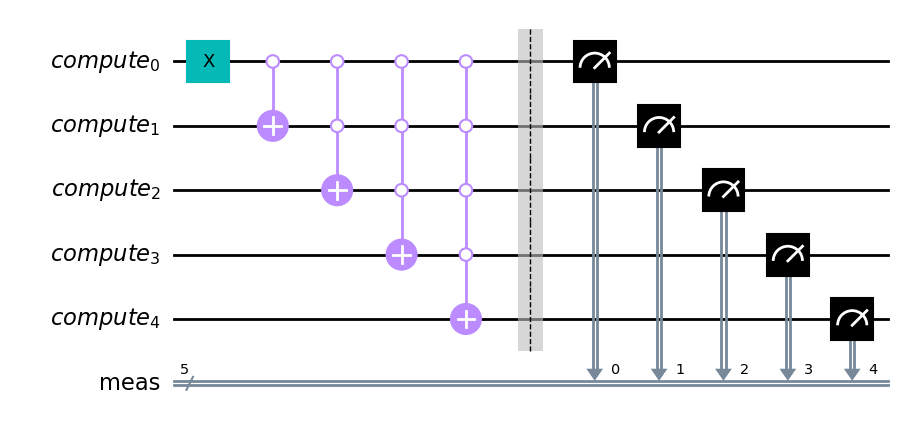

In [18]:
one_increment = OneIncrement(5)
one_increment.circuit.measure_all()
one_increment.circuit.draw(output='mpl')

In [19]:
bit_length = 4
numberRegister = QuantumRegister(bit_length, 'q')
for i in range(2**bit_length-1):

    circ = QuantumCircuit(numberRegister)
    loadNumber(circ, numberRegister, i)
    one_increment = OneIncrement(bit_length)
    circ.append(one_increment.circuit, circ.qubits)
    circ.measure_all()
    job = execute(circ, Aer.get_backend('qasm_simulator'), shots=1000)
    counts = job.result().get_counts()
    print("number: ", i, "counts", counts)
    

number:  0 counts {'0001': 1000}
number:  1 counts {'0010': 1000}
number:  2 counts {'0011': 1000}
number:  3 counts {'0100': 1000}
number:  4 counts {'0101': 1000}
number:  5 counts {'0110': 1000}
number:  6 counts {'0111': 1000}
number:  7 counts {'1000': 1000}
number:  8 counts {'1001': 1000}
number:  9 counts {'1010': 1000}
number:  10 counts {'1011': 1000}
number:  11 counts {'1100': 1000}
number:  12 counts {'1101': 1000}
number:  13 counts {'1110': 1000}
number:  14 counts {'1111': 1000}


In [36]:
job = execute(one_increment.circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts()
print(counts)

{'00001': 1000}


## Check subtractor

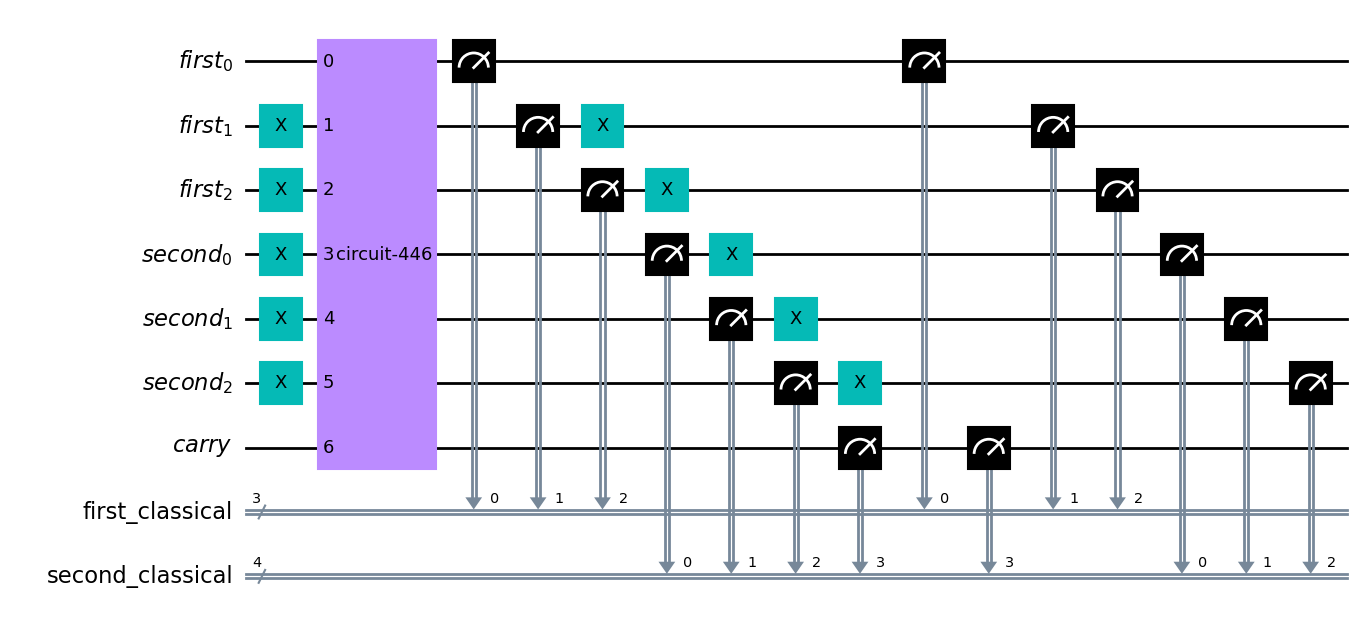

In [34]:
bitLength = 3



firstNumber = 6
secondNumber = 7

loadNumber(test_circuit, firstRegister, firstNumber)
loadNumber(test_circuit, secondRegister, secondNumber)


class Subtractor():
    def __init__(self, bitLength):
        firstRegister = QuantumRegister(bitLength, 'first')
        secondRegister = QuantumRegister(bitLength, 'second')
        carryRegister = QuantumRegister(1, 'carry')

        test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, name="subtractor")
        
        adder = DraperQFTAdder(bitLength, kind="half")
        oneIncrementer = OneIncrement(bitLength+1).circuit
        test_circuit.x(secondRegister)
        test_circuit.append(adder, firstRegister[:] + secondRegister[:] + carryRegister[:])
        test_circuit.append(oneIncrementer, secondRegister[:]+ carryRegister[:])
        self.circuit = test_circuit


test_circuit.measure(firstRegister, first_classical)

test_circuit.measure(secondRegister[:]+carryRegister[:], second_classical)
test_circuit.draw(output='mpl')

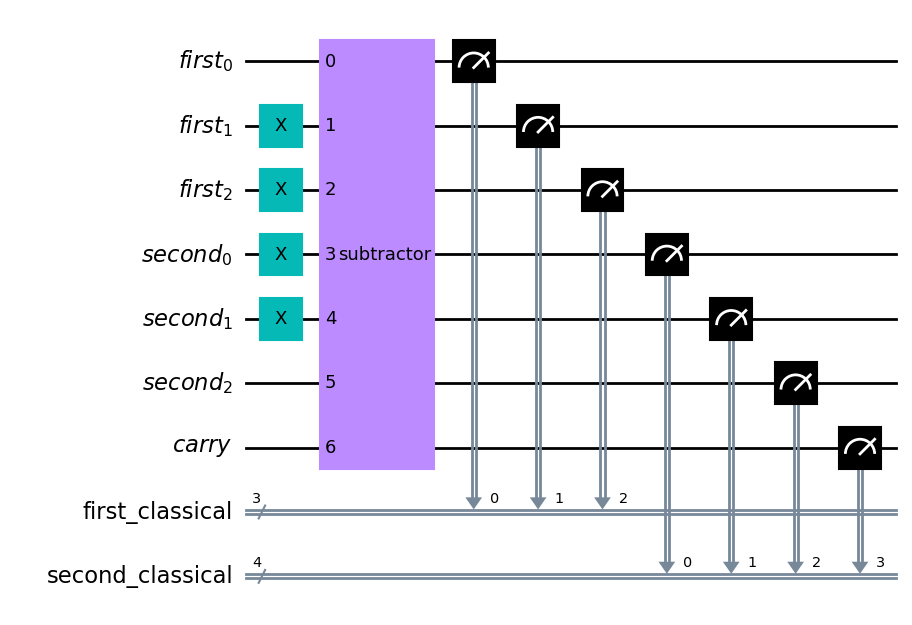

In [38]:
firstRegister = QuantumRegister(bitLength, 'first')
secondRegister = QuantumRegister(bitLength, 'second')
carryRegister = QuantumRegister(1, 'carry')

first_classical = ClassicalRegister(bitLength, 'first_classical')
second_classical = ClassicalRegister(bitLength+1, 'second_classical')

test_circuit = QuantumCircuit(firstRegister, secondRegister, carryRegister, first_classical, second_classical)

firstNumber = 6
secondNumber = 3

loadNumber(test_circuit, firstRegister, firstNumber)
loadNumber(test_circuit, secondRegister, secondNumber)

subtractor = Subtractor(bitLength).circuit

test_circuit.append(subtractor, firstRegister[:]+ secondRegister[:] + carryRegister[:])
test_circuit.measure(firstRegister, first_classical)
test_circuit.measure(secondRegister[:]+carryRegister[:], second_classical)
test_circuit.draw(output='mpl')

In [39]:
job = execute(test_circuit, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts()
print(counts)

{'1011 110': 1000}
